# Stock Opening Price Prediction (using LSTM)

## Initialization

In [1]:
# Import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('./dataset/TSLA_train.csv', index_col=['Date'], parse_dates=['Date'])
df_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2645 entries, 2010-06-30 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2645 non-null   float64
 1   High       2645 non-null   float64
 2   Low        2645 non-null   float64
 3   Close      2645 non-null   float64
 4   Adj Close  2645 non-null   float64
 5   Volume     2645 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 144.6 KB


## Plotting Opening Prices and Closing Prices

Text(0.5, 1.0, 'Opening Price of TSLA')

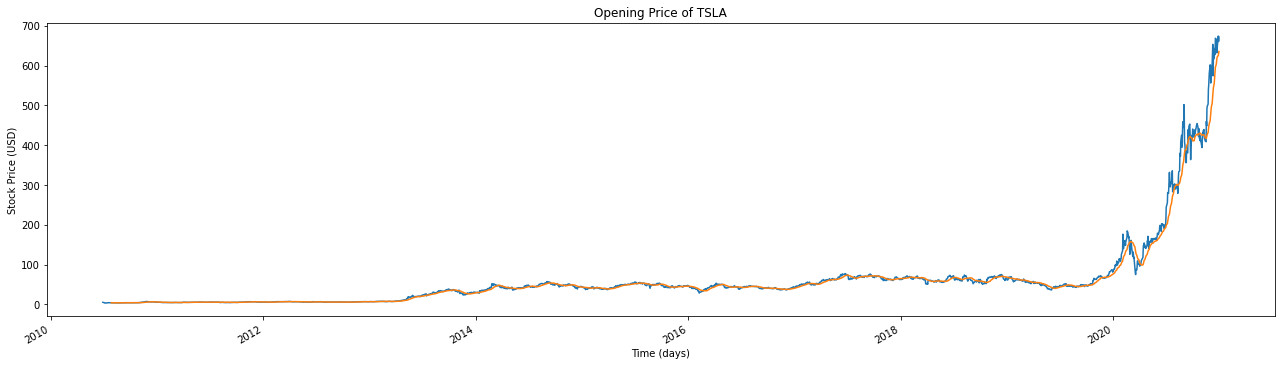

In [4]:
df_train['Open'].plot(figsize=(22, 6))
df_train.rolling(21).mean()['Close'].plot()
plt.xlabel('Time (days)')
plt.ylabel('Stock Price (USD)')
plt.title('Opening Price of TSLA')

In [5]:
train = pd.DataFrame(df_train['Open'])
train.head()

,Open
Date,
2010-06-30,5.158
2010-07-01,5.000
2010-07-02,4.600
2010-07-06,4.000
2010-07-07,3.280


## Data Preprocessing

### Imputation

### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)
train_scaled = pd.DataFrame(scaler.transform(train), index=train.index)
train_scaled.head()

,0
Date,
2010-06-30,0.002875
2010-07-01,0.002640
2010-07-02,0.002044
2010-07-06,0.001150
2010-07-07,0.000077


### Training data split into dependant and independant features

* Dependant Features (X): Past 2 Months (60 days)
* Independant Feature (y): Current Date
* Creating a training set containing values of past 2 months(x-set) and current day value (y-set) 


In [7]:
time_period = 60
n = len(train_scaled)
X_train = []
y_train = []

for i in range(time_period, n):
    X_train.append(train_scaled.iloc[i-time_period:i, 0])
    y_train.append(train_scaled.iloc[i, 0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape

* LSTM requires input data to be in 3 dimentions

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the Recurrent Neural Network

### Importing Keras libraries

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [29]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Initialising the RNN

In [10]:
regressor = Sequential()

# Layer 1
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(time_period, 1)))
regressor.add(Dropout(0.2))

# Layer 2
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Layer 3
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Layer 4
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

### Compiling the RNN

In [11]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to training set

In [12]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpv0ypb41n.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpv0ypb41n.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
81/81 [==============================] - 31s 39ms/step - loss: 0.0029
Epoch 2/100
81/81 [==============================] - 3s 38ms/step - loss: 0.0013
Epoch 3/100
81/81 [==============================] - 3s 38ms/step - loss: 0.0010
Epoch 4/100
81/81 [==============================] - 3s 39ms/step - loss: 9.6638e-04
Epoch 5/100
81/81 [==============================] - 3s 38ms/step -

## Testing the model

In [13]:
df_test = pd.read_csv('./dataset/TSLA_test.csv', index_col=['Date'], parse_dates=['Date'])
df_test.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,49649900
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900
2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500


In [14]:
test = pd.DataFrame(df_test['Open'])
test.head(10)

,Open
Date,
2020-12-31,699.989990
2021-01-04,719.460022
2021-01-05,723.659973
2021-01-06,758.489990
2021-01-07,777.630005
2021-01-08,856.000000


In [15]:
net = pd.concat((train, test), axis='rows')
# Last 2 month data on the test data
inputs = net[n-time_period:].values.reshape(-1, 1)

inputs = scaler.transform(inputs)

In [16]:
X_test = []
for i in range(time_period, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [32]:
y_pred_train = regressor.predict(X_train)
y_pred_train = scaler.inverse_transform(y_pred_train)

# y_pred_train = pd.DataFrame(y_pred_train, index=train.index)
display(y_pred_train)
len(y_pred_train)

array([[  4.727827 ],
       [  4.6537457],
       [  4.6397514],
       ...,
       [640.8122   ],
       [649.1017   ],
       [652.4295   ]], dtype=float32)

2585

In [33]:
y_pred_test = regressor.predict(X_test)
y_pred_test = scaler.inverse_transform(y_pred_test)

# y_pred_train = pd.DataFrame(y_pred_train, index=train.index)
display(y_pred_test)

array([[654.5384 ],
       [660.68146],
       [668.29694],
       [674.15314],
       [680.8055 ],
       [688.3794 ]], dtype=float32)

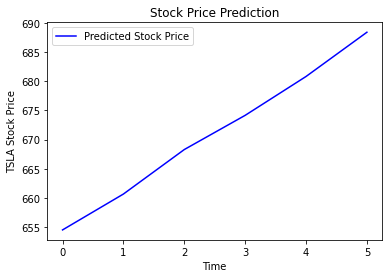

In [35]:
# Visualising the results

plt.plot(y_pred_test, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSLA Stock Price')
plt.legend()
